# Part I - ProsperLoanData Exploration

## Introduction
Outline: 
This project deals with data exploration and explanation phases of data analysis. This data set contains 113,937 loans with 81 variables on each loan, including loan amount, borrower rate (or interest rate), current loan status, borrower income, prosper rating, etc. The data dictionary for this data set is in: 
https://docs.google.com/spreadsheets/d/1gDyi_L4UvIrLTEC6Wri5nbaMmkGmLQBk-Yx3z0XDEtI/edit#gid=0


## Preliminary Wrangling

In [43]:
#import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [44]:
#overview of the original dataset
ps_loans=pd.read_csv("prosperLoanData.csv")
print(ps_loans.shape)
ps_loans.info()

(113937, 81)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   ListingKey                           113937 non-null  object 
 1   ListingNumber                        113937 non-null  int64  
 2   ListingCreationDate                  113937 non-null  object 
 3   CreditGrade                          28953 non-null   object 
 4   Term                                 113937 non-null  int64  
 5   LoanStatus                           113937 non-null  object 
 6   ClosedDate                           55089 non-null   object 
 7   BorrowerAPR                          113912 non-null  float64
 8   BorrowerRate                         113937 non-null  float64
 9   LenderYield                          113937 non-null  float64
 10  EstimatedEffectiveYield              84853 non-null   float64
 11  

In [45]:
ps_loans.head()

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20


Out of the many columns in this dataset, only those of interest will be used in this analysis. The features that we think may affect the final outcome of a loan are:
1. LoanKey: Unique key for each loan. This is the same key that is used in the API. 
2. ListingCreationDate: The date the listing was created.
3. Term: The length of the loan expressed in months.
4. LoanStatus: The current status of the loan: Cancelled,  Chargedoff, Completed, Current, Defaulted, FinalPaymentInProgress, PastDue. The PastDue status will be accompanied by a delinquency bucket.
5. BorrowerAPR: The Borrower's Annual Percentage Rate (APR) for the loan.
6. BorrowerRate: The Borrower's interest rate for this loan.
7. ProsperRating (Alpha): The Prosper Rating assigned at the time the listing was created between AA - HR.  Applicable for loans originated after July 2009.
8. CreditGrade: The Credit rating that was assigned at the time the listing went live. Applicable for listings pre-2009 period and will only be populated for those listings.
9.  ListingCategory (numeric): The category of the listing that the borrower selected when posting their listing: 0 - Not Available, 1 - Debt Consolidation, 2 - Home Improvement, 3 - Business, 4 - Personal Loan, 5 - Student Use, 6 - Auto, 7- Other, 8 - Baby&Adoption, 9 - Boat, 10 - Cosmetic Procedure, 11 - Engagement Ring, 12 - Green Loans, 11 - Household Expenses, 14 - Large Purchases, 15 - Medical/Dental, 16 - Motorcycle, 17 - RV, 18 - Taxes, 19 - Vacation, 20 - Wedding Loans.
10. EmploymentStatus: The employment status of the borrower at the time they posted the listing.
11. IncomeRange: The income range of the borrower at the time the listing was created.
12. LoanOriginalAmount: The origination amount of the loan.

#### Build features of interest dataframe for Assess and Clean

In [46]:
#load the dataset into a pandas dataframe
loans=pd.read_csv("prosperLoanData.csv", 
                  usecols = ['LoanKey','ListingCreationDate','Term', 'LoanStatus','BorrowerAPR','BorrowerRate',
                             'ProsperRating (Alpha)','CreditGrade','ListingCategory (numeric)',
                             'EmploymentStatus', 'IncomeRange','LoanOriginalAmount'])
loans=loans.reindex(columns= ['LoanKey','ListingCreationDate','Term', 'LoanStatus','BorrowerAPR','BorrowerRate',
                             'ProsperRating (Alpha)','CreditGrade','ListingCategory (numeric)',
                             'EmploymentStatus', 'IncomeRange','LoanOriginalAmount'])

In [47]:
#modify column names to improve readability
loans.rename(columns = {'ListingCreationDate': 'ListingDate',
                    'ProsperRating (Alpha)': 'ProsperRating', 
                    'ListingCategory (numeric)': 'ListingCat',
                    'EmploymentStatus': 'JobStatus',
                    'LoanOriginalAmount': 'LoanAmount'}, inplace = True)

In [48]:
#dataframe summary
print(loans.shape)
loans.info()

(113937, 12)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 12 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   LoanKey        113937 non-null  object 
 1   ListingDate    113937 non-null  object 
 2   Term           113937 non-null  int64  
 3   LoanStatus     113937 non-null  object 
 4   BorrowerAPR    113912 non-null  float64
 5   BorrowerRate   113937 non-null  float64
 6   ProsperRating  84853 non-null   object 
 7   CreditGrade    28953 non-null   object 
 8   ListingCat     113937 non-null  int64  
 9   JobStatus      111682 non-null  object 
 10  IncomeRange    113937 non-null  object 
 11  LoanAmount     113937 non-null  int64  
dtypes: float64(2), int64(3), object(7)
memory usage: 10.4+ MB


In [49]:
#check duplicates
loans.duplicated().sum()

871

In [50]:
#select 5 sample duplicates
loans[loans['LoanKey'].duplicated()].head()

,LoanKey,ListingDate,Term,LoanStatus,BorrowerAPR,BorrowerRate,ProsperRating,CreditGrade,ListingCat,JobStatus,IncomeRange,LoanAmount
9,02163700809231365A56A1C,2013-12-02 10:43:39.117000000,36,Current,0.07620,0.0629,AA,NaN,7,Employed,"$25,000-49,999",10000
999,CB643706582969191E8C26B,2013-12-18 14:25:17.053000000,60,Current,0.17710,0.1535,B,NaN,1,Employed,"$25,000-49,999",10000
2539,DC303708663304668E74587,2014-01-11 07:50:08.037000000,60,Current,0.14528,0.1224,B,NaN,1,Employed,"$100,000+",35000
4942,8D84369399064302947D8B5,2013-09-26 09:35:36.317000000,36,Current,0.35356,0.3134,HR,NaN,7,Employed,"$50,000-74,999",4000
5812,129C369881799628360C904,2013-09-24 13:27:48.287000000,36,Current,0.24205,0.2045,C,NaN,1,Other,"$50,000-74,999",15000


In [51]:
#inspect the first two duplicates and determine if we need to keep them
loans.query("LoanKey=='02163700809231365A56A1C' or LoanKey=='CB643706582969191E8C26B'")

,LoanKey,ListingDate,Term,LoanStatus,BorrowerAPR,BorrowerRate,ProsperRating,CreditGrade,ListingCat,JobStatus,IncomeRange,LoanAmount
8,02163700809231365A56A1C,2013-12-02 10:43:39.117000000,36,Current,0.0762,0.0629,AA,NaN,7,Employed,"$25,000-49,999",10000
9,02163700809231365A56A1C,2013-12-02 10:43:39.117000000,36,Current,0.0762,0.0629,AA,NaN,7,Employed,"$25,000-49,999",10000
998,CB643706582969191E8C26B,2013-12-18 14:25:17.053000000,60,Current,0.1771,0.1535,B,NaN,1,Employed,"$25,000-49,999",10000
999,CB643706582969191E8C26B,2013-12-18 14:25:17.053000000,60,Current,0.1771,0.1535,B,NaN,1,Employed,"$25,000-49,999",10000
57494,CB643706582969191E8C26B,2013-12-18 14:25:17.053000000,60,Current,0.1771,0.1535,B,NaN,1,Employed,"$25,000-49,999",10000


The above duplicated entries show each duplicate-pair is referring to the same loan. For instance, take a look the
loan(loankey: 02163700809231365A56A1C), all the columns showed the same values. The same is true for loan
(loankey: CB643706582969191E8C26B). So it is safe to delete these duplicates during cleaning.

In [52]:
#drop duplicates
loans.drop_duplicates(subset = 'LoanKey', inplace = True)

#return False when all duplicates removed
loans.LoanKey.duplicated().any()

False

In [53]:
#convert ListingDate to the correct datatype
loans['ListingDate'] = pd.to_datetime(loans['ListingDate'])
#check
print(loans.ListingDate.dtype)

datetime64[ns]


In [54]:
#check null values by columns
loans.isnull().sum()

LoanKey              0
ListingDate          0
Term                 0
LoanStatus           0
BorrowerAPR         25
BorrowerRate         0
ProsperRating    29084
CreditGrade      84113
ListingCat           0
JobStatus         2255
IncomeRange          0
LoanAmount           0
dtype: int64

In [55]:
#clean up LoanStatus
#There are too many levels that make unnecessary noise in the visualisation.
lsMap={'Past Due (1-15 days)': 'Past Due','Past Due (16-30 days)': 'Past Due','Past Due (31-60 days)': 'Past Due', 
        'Past Due (61-90 days)': 'Past Due', 'Past Due (91-120 days)': 'Past Due',
        'Past Due (>120 days)': 'Past Due','FinalPaymentInProgress': 'Completed'}
loans['LoanStatus']=loans['LoanStatus'].replace(lsMap)

#Drop cancelled types which are loans that are not created in the first place
loans=loans[loans['LoanStatus'] != 'Cancelled']

#Check
print(loans.query("LoanStatus == 'Cancelled'").shape[0])

0


In [56]:
#fill BorrowerApr null values with the mean value 
loans['BorrowerAPR'].fillna(value=loans['BorrowerAPR'].mean(), inplace=True)
loans.isnull().sum()

LoanKey              0
ListingDate          0
Term                 0
LoanStatus           0
BorrowerAPR          0
BorrowerRate         0
ProsperRating    29079
CreditGrade      84113
ListingCat           0
JobStatus         2252
IncomeRange          0
LoanAmount           0
dtype: int64

In [57]:
#With where() method, we can merge ProsperRating(after-07/2009) data with CreditGrade(pre-2009) values. If
#CreditGrade is not null, takes its value. Otherwise, use the ProsperRating values.
loans['ProsperRating'] = np.where(loans['CreditGrade'].notnull(), loans['CreditGrade'], loans['ProsperRating'])

#Replace null values in ProsperRating with 'NC'
mapnull = {np.NaN: "NC", 
           np.nan: "NC"}
loans['ProsperRating'] = loans['ProsperRating'].replace(mapnull)

#Check
print(loans['ProsperRating'].value_counts())

C     23744
B     19757
D     19323
A     17704
E     13005
HR    10422
AA     8834
NC      272
Name: ProsperRating, dtype: int64


In [58]:
#Replace missing values in JobStatus with 'Not Available'
loans['JobStatus'] = loans['JobStatus'].fillna('Not available')

#reduce noise in visualization
loans['JobStatus'] = loans['JobStatus'].replace('Retired', 'Not employed')

#check
print(loans.JobStatus.unique())

['Self-employed' 'Employed' 'Not available' 'Full-time' 'Other'
 'Not employed' 'Part-time']


In [59]:
#Reduce noise in visualization
loans['IncomeRange'] = loans['IncomeRange'].replace('Not employed','$0')
loans['IncomeRange'] = loans['IncomeRange'].replace('Not displayed','$0')

#check
print(loans.IncomeRange.unique())

['$25,000-49,999' '$50,000-74,999' '$0' '$100,000+' '$75,000-99,999'
 '$1-24,999']


In [60]:
#After combining the data with ProsperRating, we can drop CreditGrade from the dataframe.
loans.drop(columns = 'CreditGrade', inplace = True)

#check cleaning step
loans.isnull().sum()

LoanKey          0
ListingDate      0
Term             0
LoanStatus       0
BorrowerAPR      0
BorrowerRate     0
ProsperRating    0
ListingCat       0
JobStatus        0
IncomeRange      0
LoanAmount       0
dtype: int64

In [61]:
#For ListingCat, convert numeric values into labels to facilitate visualization later
listLabels={0: 'Not Available', 1: 'Debt Consolidation', 2: 'Home Improvement', 3: 'Business', 4: 'Personal Loan',
            5: 'Student Use', 6: 'Auto', 7: 'Other', 8: 'Baby&Adoption', 9: 'Boat', 10: 'Cosmetic Procedure', 
            11: 'Engagement Ring', 12: 'Green Loans', 13: 'Household Expenses', 14: 'Large Purchases', 
            15: 'Medical/Dental', 16: 'Motorcycle', 17: 'RV', 18: 'Taxes', 19: 'Vacation', 20: 'Wedding Loans'}

def listingcat_label(loans):
    """
      This function translates the numeric values in the dictionary listLabels into ListingCat labels 
    """
    if loans['ListingCat'] in listLabels.keys():
        listLabel=listLabels[loans['ListingCat']]
        return listLabel
    else:
        return loans['ListingCat']

#convert into labels columnwise
loans['ListingCat']=loans.apply(listingcat_label,axis=1)

#Check
print(loans.ListingCat.unique())

['Not Available' 'Home Improvement' 'Motorcycle' 'Debt Consolidation'
 'Other' 'Household Expenses' 'Auto' 'Medical/Dental' 'Wedding Loans'
 'Vacation' 'Business' 'Taxes' 'Baby&Adoption' 'Personal Loan'
 'Engagement Ring' 'Large Purchases' 'Student Use' 'Boat' 'RV'
 'Cosmetic Procedure' 'Green Loans']


In [62]:
#Convert these columns into Categorical dtype
categorical_map={'LoanStatus': ['Completed','Current','Past Due','Chargedoff','Defaulted'],
                 'JobStatus': ['Not employed','Not available','Other','Part-time','Self-employed','Full-time','Employed'],
                 'IncomeRange': ['$0','$1-24,999','$25,000-49,999','$50,000-74,999','$75,000-99,999','$100,000+'],
                 'ProsperRating': ['AA','A','B','C','D','E','HR','NC']}
    
for var in categorical_map:
    ordered_var=pd.api.types.CategoricalDtype(ordered=True, categories=categorical_map[var])
    loans[var]=loans[var].astype(ordered_var)
    
#check
print(loans.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 113061 entries, 0 to 113936
Data columns (total 11 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   LoanKey        113061 non-null  object        
 1   ListingDate    113061 non-null  datetime64[ns]
 2   Term           113061 non-null  int64         
 3   LoanStatus     113061 non-null  category      
 4   BorrowerAPR    113061 non-null  float64       
 5   BorrowerRate   113061 non-null  float64       
 6   ProsperRating  113061 non-null  category      
 7   ListingCat     113061 non-null  object        
 8   JobStatus      113061 non-null  category      
 9   IncomeRange    113061 non-null  category      
 10  LoanAmount     113061 non-null  int64         
dtypes: category(4), datetime64[ns](1), float64(2), int64(2), object(2)
memory usage: 7.3+ MB
None


In [63]:
#Reset index & drop the original index 
loans=loans.reset_index(drop = True)

### What is the structure of your dataset?
> By selecting those features that are of interest in this analysis, we created a subset of the original file with 113066 rows and 11 columns after preliminary cleaning. Most of the variables are either numeric or string types, ListingDate is datetime and ListingCat variable is categorical variable.

### What is/are the main feature(s) of interest in your dataset?
> The main interest is to figure out what features are affecting LoanStatus.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?
> These are the features that may support this investigation: BorrowerAPR, BorrowerRate, LoanAmount, IncomeRange, JobStatus, Term, and ProsperRating.

## Univariate Exploration

This section further investigate each variable's distributions, frequencies, etc. so as to get more in-depth understanding of data.

In [64]:
#What is the distribution of loan counts across time periods?
#Let's group loan counts by year
loans['Year']=loans['ListingDate'].dt.year 
df_year=loans.groupby("Year").ListingDate.count().reset_index()
df_year

,Year,ListingDate
0,2005,23
1,2006,6209
2,2007,11557
3,2008,11262
4,2009,2206
5,2010,5530
6,2011,11442
7,2012,19556
8,2013,34791
9,2014,10485


In [65]:
#The last months of loans issued by year so as to set time boundaries
loans.groupby("Year")['ListingDate'].max()

Year
2005   2005-12-29 19:53:41.000
2006   2006-12-31 22:19:25.897
2007   2007-12-31 23:58:02.303
2008   2008-10-16 20:58:14.297
2009   2009-12-31 20:38:37.423
2010   2010-12-31 16:11:23.507
2011   2011-12-31 21:38:03.490
2012   2012-12-31 23:23:52.907
2013   2013-12-31 22:28:19.927
2014   2014-03-10 12:20:53.760
Name: ListingDate, dtype: datetime64[ns]

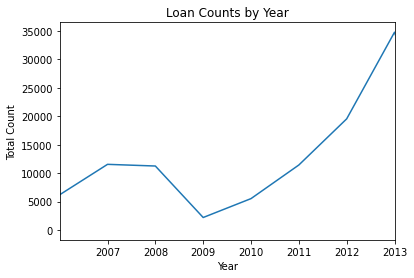

In [66]:
#What is the loan distribution by year?

#Plot visualization to view loan counts distributions
#The counts in 2005 is small in comparing with other years. So we can exclude this so as not to skew the result.
#Unlike other years with 12 months of data, 2014 only had partial counts (till March) that is not suitable to  
#measure like preceeding years.
sb.lineplot(data=df_year, x = 'Year', y = 'ListingDate')
plt.title("Loan Counts by Year")
plt.xlabel("Year")
plt.ylabel("Total Count")
plt.xlim(2006, 2013)
plt.xticks([2007, 2008, 2009, 2010, 2011, 2012, 2013])
plt.show()

This plot shows wide swings between 2006 and 2009 with the lowest counts of 2,206 in 2009. Thereafter, the loan counts begins the steep uptrend and peaked in 2013 with close to 35,000 loans issued. 

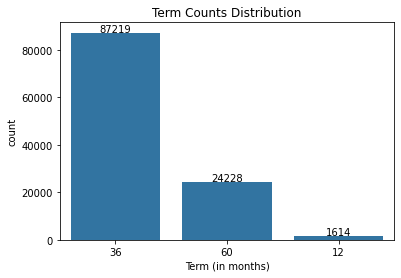

In [67]:
#What is the Term (length of the loan in months) distributions looks like?
Term_order = loans['Term'].value_counts().index
base_color = sb.color_palette()[0]
sb.countplot(data=loans, x='Term', color=base_color, order=Term_order);
plt.xlabel('Term (in months)');
plt.title('Term Counts Distribution');

for i in range (loans.Term.value_counts().shape[0]):
    count = loans.Term.value_counts().values[i]
    plt.text(i, count+3800, count, ha = 'center', va='top')

Above plot suggests the most popular loan term is the 36-month kind. Meanwhile, 12-month type is less common as only a small number of borrowers (1,614) chose this term in comparison with the number of borrowers (87,224) of the
36-month plan.

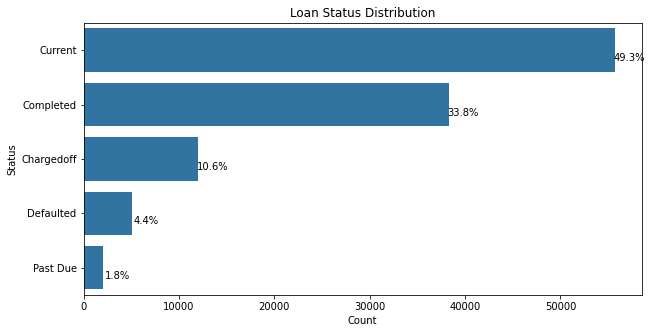

In [68]:
#What is the Loan Status Distribution looks like?
plt.figure(figsize=[10, 5])
sb.countplot(data=loans,y='LoanStatus',color=base_color,order=loans.LoanStatus.value_counts().index);
plt.title('Loan Status Distribution')
plt.ylabel('Status')
plt.xlabel('Count')

nbr_loans = loans.shape[0]
val_counts = loans['LoanStatus'].value_counts()
locs, labels = plt.yticks() #get init locs & labels

#loop thru each pair of locs-labels
for loc, label in zip(locs, labels):
    count = val_counts[label.get_text()] #get count via label
    pct_string = '{:0.1f}%'.format(100*count/nbr_loans)
    plt.text(count+1500, loc+0.2,  pct_string, ha = 'center', color = 'black');

Above graph shows most of the loans are in 'Current' (close to 50%) status. And then followed by 'Completed' (33.8%), Chargedoff (10.6%), and Defaulted (4.4%). Moreover, it shows there is a wide gap between the first two statuses with the rest.

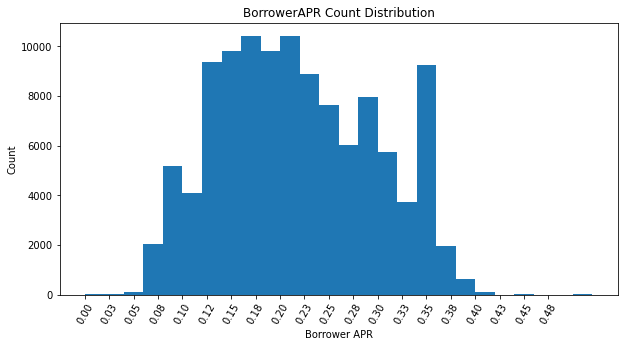

In [69]:
#What is the BorrowerAPR Distribution looks like?
plt.figure(figsize=[10,5])
ticks=list(np.arange(0, 0.5, 0.025))
labels=['{:.2f}'.format(v) for v in ticks]
bins=np.arange(0, loans['BorrowerAPR'].max()+.02, .02)
plt.hist(data=loans, x='BorrowerAPR', bins = bins);
plt.xticks(ticks, labels);
plt.xticks(rotation = 60); 
plt.xlabel('Borrower APR')
plt.ylabel('Count')
plt.title("BorrowerAPR Count Distribution");

The plot shows BorrowerAPR is a multimodal distribution. There are peaks on 0.16 and 0.2, then a sharp spike between 0.35 and 0.36. Plus, there are very few loans for APR greater than 0.42. 

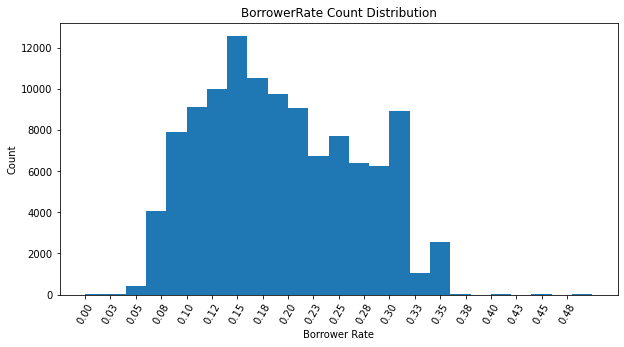

In [70]:
#What is the BorrowerRate Distribution looks like?
plt.figure(figsize=[10,5])
ticks=list(np.arange(0, 0.5, 0.025))
labels=['{:.2f}'.format(v) for v in ticks]
bins=np.arange(0, loans['BorrowerRate'].max()+.02, .02)
plt.hist(data=loans, x='BorrowerRate', bins = bins);
plt.xticks(ticks, labels);
plt.xticks(rotation = 60); 
plt.xlabel('Borrower Rate')
plt.ylabel('Count')
plt.title("BorrowerRate Count Distribution");

Similar to the plot of BorrowerAPR, BorrowerRate is a multimodal distribution. There are peaks on 0.15, 0.25, and between 0.31 and 0.32. In addition, there are only a tiny number of loans for Borrower Rate greater than 0.36.

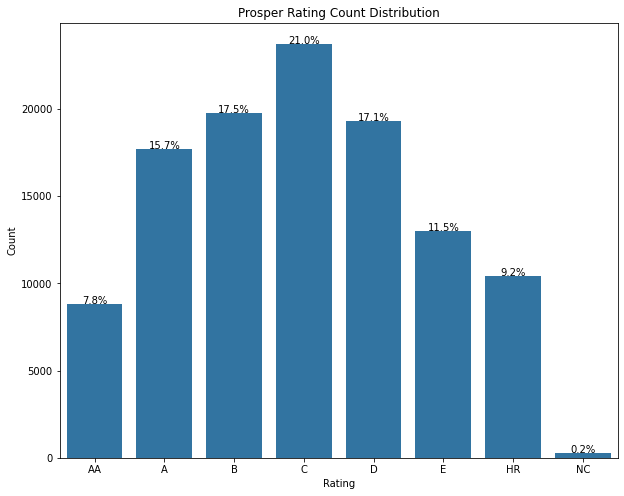

In [71]:
#What is the ProsperRating distribution looks like?

def pRate_labels(var, x, **kwargs):
    """
     This function is to plot bar graph of ProsperRating using Countplot function.
    """
    pRate=var.value_counts()
    base_color=sb.color_palette()[0]
    ax=plt.figure(figsize= (10, 8)).subplots()
    #order=loans.ProsperRating.value_counts().index
    #sb.countplot(data=loans, x=x, hue=None, color= base_color, order=order);
    sb.countplot(data=loans, x=x, hue=None, color= base_color);

    locs, labels=plt.xticks()
    for loc, label in zip(locs, labels):
        count=pRate[label.get_text()]
        pct='{:.1f}%'.format((count * 100) / pRate.sum())
        mv=plt.text(loc, count, pct, ha= 'center', va= 'baseline')
    
    return mv

#A plot to show Prosper Rating distribution
pRate_labels(loans['ProsperRating'], 'ProsperRating')
plt.title('Prosper Rating Count Distribution')
plt.xlabel('Rating')
plt.ylabel('Count');

The plot shows that rating 'C' had the largest share (21%) in the loans issued. Then it is followed by 
'B'(17.5%), 'C'(17.1%) and 'A'(15.7%). That means about half of the borrowers(55.6%) are in the C, B, or D ratings. The percentage for higher ratings (AA or A) borrowers are much less than the other 3 types. It is probably because
higher ratings require stricter conditions to meet the grade.

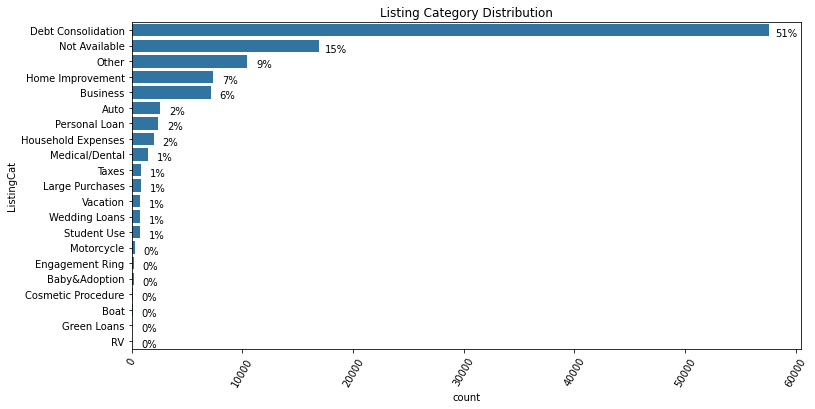

In [72]:
#What is the count distribution or any pattern in ListingCat?
lc_Order=loans.ListingCat.value_counts().index
plt.figure(figsize=[12, 6])
sb.countplot(data=loans,y='ListingCat',color=base_color, order=lc_Order);
plt.title('Listing Category Distribution')
plt.xticks(rotation=60)

#start labeling 
l_counts=loans.shape[0]
lc_counts=loans['ListingCat'].value_counts()
locs, labels = plt.yticks()

for loc, label in zip(locs, labels):
    count=lc_counts[label.get_text()] #get count from the label
    pct_label='{:0.0f}%'.format(100*count/l_counts) #compute percentage
    plt.text(count+1500,loc+0.4,pct_label,ha='center',color='black');

The above plot shows debt consolidation has the highest counts (close to 51%). It means that borrowers in this category had the most loans. This suggests many borrowers turned to debt consolidation loans so as to reduce their debt weights by paying a loan with lower monthly rate or lower payment.

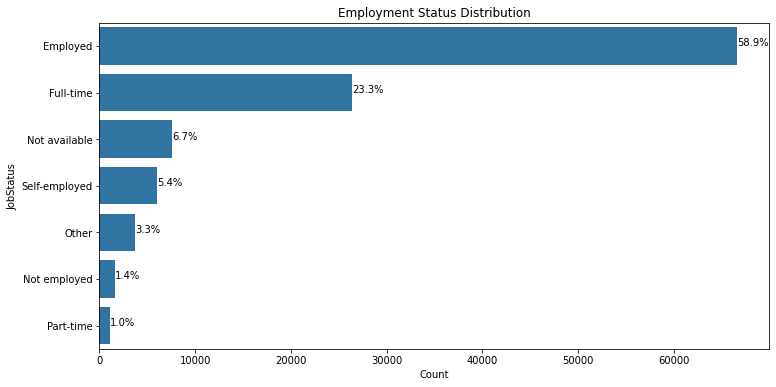

In [73]:
#What is the distribution pattern of JobStatus?
plt.figure(figsize=[12, 6])
JS=sb.countplot(y=loans['JobStatus'],color=base_color,order=loans.JobStatus.value_counts().index)

for patch in JS.patches:
    JS_counts=len(loans.JobStatus)
    pct="{:.1f}%".format(100 * patch.get_width()/JS_counts)
    x=patch.get_x()+patch.get_width()
    y=patch.get_y()+patch.get_height()/2
    JS.annotate(pct, (x, y))
    
plt.title("Employment Status Distribution")
plt.xlabel("Count")
plt.show();

The plot indicates that 'Employed' status had the largest share (close to 59%) among borrowers. Next group is the Full-time (23.3%) status. This implies 'Employed' borrowers or those with 'Full-time' status are preferred by lenders over other types.

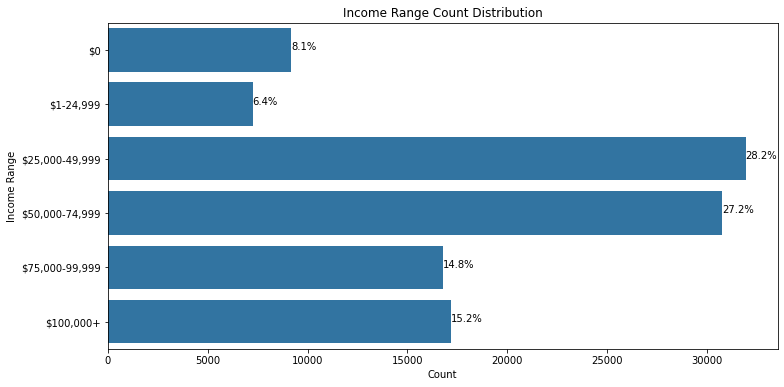

In [74]:
#What is the IncomeRange distribution pattern? 
plt.figure(figsize=[12, 6])
#IC=sb.countplot(y=loans['IncomeRange'],color=base_color,order=loans.IncomeRange.value_counts().index)
#IC=sb.countplot(y=loans['IncomeRange'],color=base_color)
IC=sb.countplot(y=loans['IncomeRange'],color=base_color)
plt.title("Income Range Count Distribution")
plt.xlabel("Count")
plt.ylabel("Income Range")

for patch in IC.patches:
    IC_counts=len(loans.IncomeRange)
    pct="{:.1f}%".format(patch.get_width()/IC_counts * 100)
    x=patch.get_x()+patch.get_width()
    y=patch.get_y()+patch.get_height()/2
    IC.annotate(pct, (x, y))

plt.show();

The chart indicates over half of the borrowers (55.4%) have income range between 25,000-49,999 and 50,000-74,999 respectively. On the other hand, borrowers (14.8%) with income range of 75,000-99,999 almost had the same share of loans with those borrowers (15.2%) earned over 100,000. So those earned between 25,000-49,999 had the largest share of loans made.

count    113061.000000
mean       8315.054838
std        6236.987928
min        1000.000000
25%        4000.000000
50%        6300.000000
75%       12000.000000
max       35000.000000
Name: LoanAmount, dtype: float64


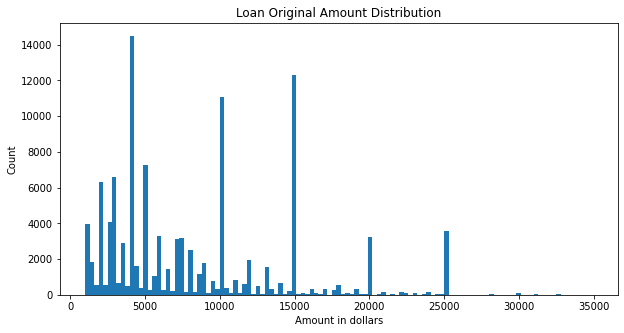

In [75]:
#What is the distribution pattern of LoanAmount?
la_bins=np.arange(1000,loans.LoanAmount.max()+40,300)
plt.figure(figsize=[10,5])
plt.hist(x='LoanAmount',data=loans,bins=la_bins)
plt.title('Loan Original Amount Distribution')
plt.ylabel('Count');
plt.xlabel('Amount in dollars');

#LoanOriginalAmount Statistics Summary  
print(loans.LoanAmount.describe())

The original amount is right-skewed. A few values are significantly larger than all other values. The lowest loan amount is 1,000 and the highest is 35,000. By using a log scale, it is easier to visualize the smaller values and differenes on the chart.

count    5.053313
mean     3.919865
std      3.794975
min      3.000000
25%      3.602060
50%      3.799341
75%      4.079181
max      4.544068
Name: LoanAmount, dtype: float64


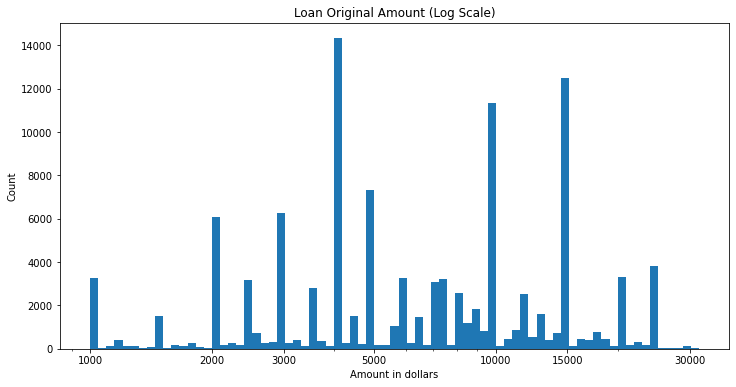

In [76]:
#What is the distribution pattern of LoanAmount in log scale?

#Plot LoanAmount in log scale
plt.figure(figsize=[12,6])
la_bins=10** np.arange(3,4.5+0.01,0.02)
tick = [1000,2000,3000,5000,10000,15000,30000]
labels=['{}'.format(x)for x in tick]
plt.hist(x='LoanAmount',data=loans,bins=la_bins)
plt.xscale('log')
plt.xticks(tick,labels)
plt.title('Loan Original Amount (Log Scale)')
plt.ylabel('Count');
plt.xlabel('Amount in dollars');

#LoanOriginalAmount Statistics Summary in log scale
print(np.log10(loans['LoanAmount'].describe()))

The plot shows there is a peak between amount of 3k and 5k with counts of around 14,000. Another two smaller spikes happened between the amount of 10k and 15k.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?
> BorrowerRate appears as a multimodal distribution with a peak at centered at 15% and another peak at between 30% and 32%. Additionally, it showed very few loans have a Borrower Rate higher than 35%. There is no need to do any transformations for visualization.
>
> For JobStatus, it appears those people indicated that they are 'Employed' or had a Full-time position would be easier to access loans offered by lenders. It appears data transformation is not requried.
>
> IncomeRange has a range of specific values that makes it easier for plotting. No need to do any special transformation. In addition, the distribution of these values appeared spread evenly across different ranges.
>
>The Loan Original Amount shows a multimodal distribution with very few percentage of loans given out within the price range of 30,000-35000 dollars. In fact, the majority of loans were made in the amount range of 15,000 and below. The graph appears as right skewed so a log transformation can help to interpret the visualization.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?
> It showed that only a tiny proportion of loans (1614 cf. 87,224 of 36 months) were given out for a 12 month Term with Debt consolidation as the main reason for loans. 
>
> Adjustment was made on the feature ProsperRating because those pre-2009 values were absent. By combining with values from variable CreditGrade, data for ProsperRating was better evenly distributed across the time periods we tried to investigate.   
>
> For the feature Loan Original Amount, adjustments were made on the bins size in order to reduce noise in the chart and better view of data, in addition to use log scale to make data interpretation more easily.

## Bivariate Exploration

Let's start with a correlation matrix between numeric variables to get an overview.

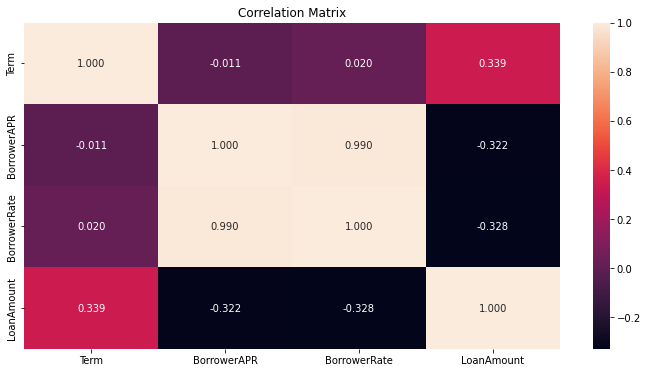

In [77]:
#What is the relationship of numeric variables like in correlation matrix?

#List of interested numeric variables 
num_vars = ['Term','BorrowerAPR','BorrowerRate','LoanAmount']

plt.figure(figsize=[12,6])
sb.heatmap(data=loans[num_vars].corr(),annot=True,fmt='.3f')
plt.title('Correlation Matrix')
plt.show();

There is strong correlation between BorrowerAPR and BorrowerRate. In a word, the BorrowerRate tends to rise as the BorrowerAPR rises, and vice versa. Term and Loan Original Amount have a modest correlation.

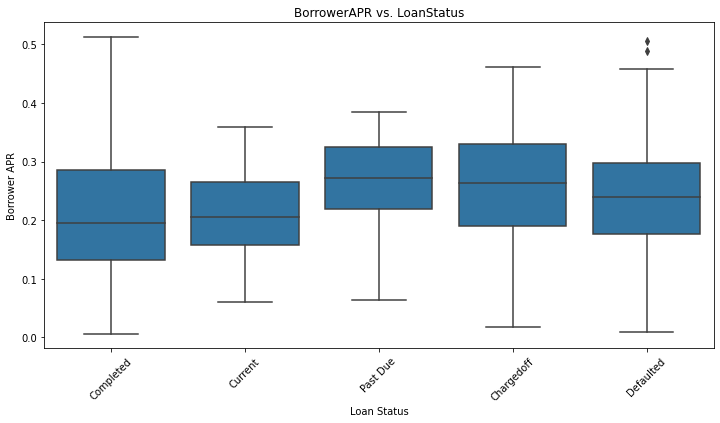

In [78]:
#What is the relationship between BorrowerAPR and LoanStatus?
plt.figure(figsize = [12, 6])
sb.boxplot(data=loans,y='BorrowerAPR',x='LoanStatus',color=base_color);
plt.title('BorrowerAPR vs. LoanStatus');
plt.ylabel('Borrower APR');
plt.xlabel('Loan Status');
plt.xticks(rotation=45);

The chart shows those 'Current' and 'Completed' loans have lower rate and lower mean than the Past Due, Chargedoff, and Defaulted ones.

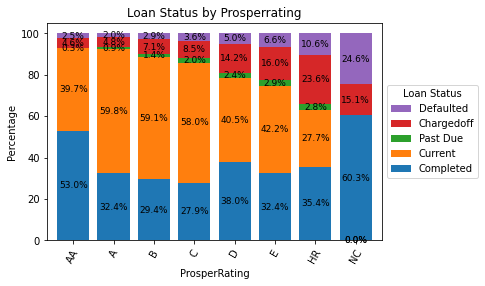

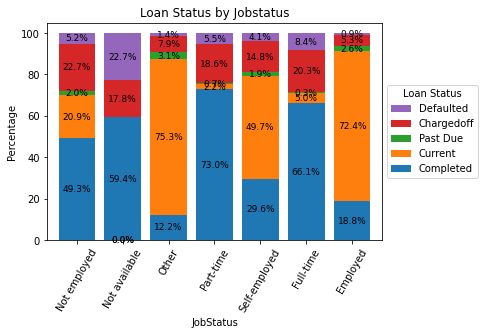

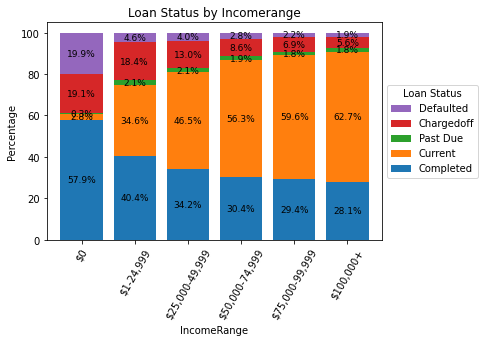

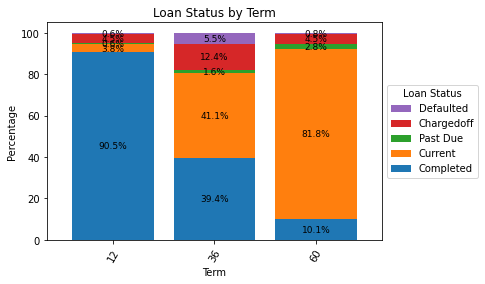

In [79]:
#Find relationship between these variables and LoanStatus?

def loan_stat(catVar, mainVar = 'LoanStatus'):
    df_rating=loans.groupby(catVar)[mainVar].value_counts(normalize = True).mul(100).unstack()
    ax=df_rating.plot.bar(stacked = True, rot = 0, width = 0.8)
    #use get_legend_handles_labels() to reverse legend's order
    handles, labels = ax.get_legend_handles_labels() 
    ax.legend(reversed(handles),reversed(labels),loc='center left',bbox_to_anchor=(1, 0.5),title ='Loan Status')
    plt.xticks(rotation = 60)
    plt.ylabel('Percentage')
    plt.title('Loan Status by {}'.format(catVar.title()))
    for patch in ax.patches:
        plt.annotate(f"{patch.get_height():.1f}%",
                    (patch.get_x()+patch.get_width()/2, 
                     patch.get_y()+patch.get_height()/2), 
                     ha='center', va='center', color='black', fontsize=9)
    plt.show()

loan_stat('ProsperRating')
loan_stat('JobStatus')
loan_stat('IncomeRange')
loan_stat('Term')

When loan status are examines across different categorical variables, correlations are detected between prosper-rating and loan status, and income range and loan status.

> From the Loan Status by ProsperRating chart, we can see the AA grade had the biggest Completed percentage (53%). However, higher grade did not lead to higher completion rate. For example, the lower percentage of A grade than D grade. Another pattern we can identify is the Defaulted percentage goes up as the rating goes down from AA to HR.
>
> Loan Status by JobStatus: the chart shows the Full-time group had higher Defaulted percentage(8.4%) than those Not employed (5.2%). This might suggest the lender to investigate further the notion that those full-time employed borrowers have better chance of paying back the loans than those Not employed.
>
> Loan Status by IncomeRange: the graph indicates those 100K+ income range groups had the highest percentage in the Current category. This may be because this group had larger loan amounts or they wanted to take longer period to pay back in full. This group also had the lowest Completed percentage when compared with other groups. 
>
> Loan status by Term: the chart suggests that both 60- and 12-month terms had lower Defaulted percentages than the 36-month term. In addition, the 12-month term had the highest Completed status to suggest that borrowers in this category had the highest rate to pay back the loans.

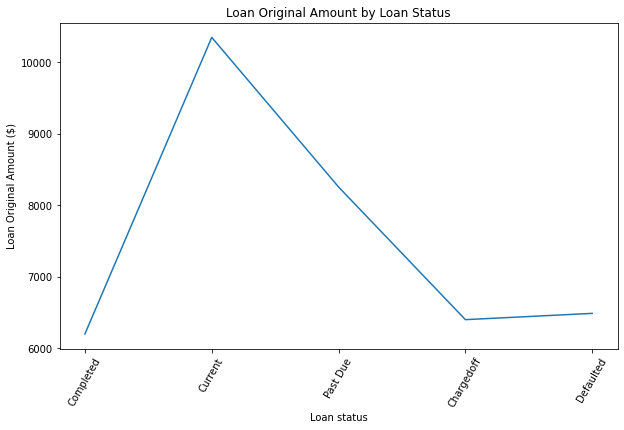

In [80]:
#What is the relationship between average Loan Original Amount and Loan Status?
plt.figure(figsize=[10,6])
plt.title("Loan Original Amount by Loan Status")
plt.plot(loans.groupby('LoanStatus')['LoanAmount'].mean())
plt.xlabel('Loan status')
plt.ylabel('Loan Original Amount ($)')
plt.xticks(rotation=60)
plt.show();

From the above chart, we can see that only Current statuses stood out as the category that had access to higher 
loan sizes. Thus we can say that the loan original amount did not have any big impact on the loan statuses of borrowers. Another observation is that Defaulted-prone statuses have higher loan original amount than Completed ones. The difference, however, is not that notable.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> Loan Status and ProsperRating are negatively correlated; the lower the Loan Status, the higher the Defaulted rating. Those borrowers with higher ProsperRating tend to pay back the loans or keep them in Current (rather than Past Dues or in Defaulted) statuses.
>
> Loan Status and IncomeRange are positively correlated; when the borrowers' IncomeRange goes up, the Current and Completed statuses tend to go up as well. This suggests those high income borrowers tend to keep their Loan Status in good conditions rather than in Chargedoff or Defaulted modes. 

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> The BorrowerAPR and BorrowerRate have a strong correlation. The BorrowerAPR will rise if the APR rises, and vice versa. This makes sense as these two measures are fundamentally very similar.
> On the other hand, the relationship between Term and Loan Original Amount is modestly positive. This shows a tendency of those borrowers who take out a larger loan initially would take a longer payback Term.

## Multivariate Exploration

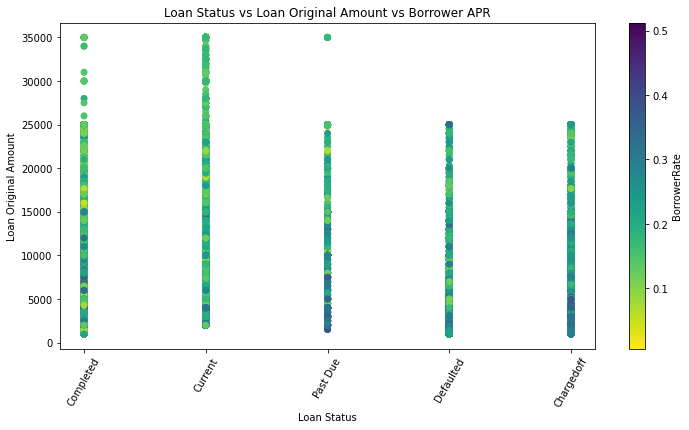

In [81]:
#What is the relationship between LoanStatus vs BorrowerAPR vs Loan Original Amount?
plt.figure(figsize = [12, 6])
plt.scatter(data=loans,x='LoanStatus',y='LoanAmount',c='BorrowerAPR',cmap='viridis_r')
plt.colorbar(label='BorrowerRate');
plt.title('Loan Status vs Loan Original Amount vs Borrower APR');
plt.xlabel('Loan Status');
plt.ylabel('Loan Original Amount');
plt.xticks(rotation=60);

The plot shows that the Current status has biggest Loan Amount among all other types but there's no clear pattern exhibits between the two variables.  

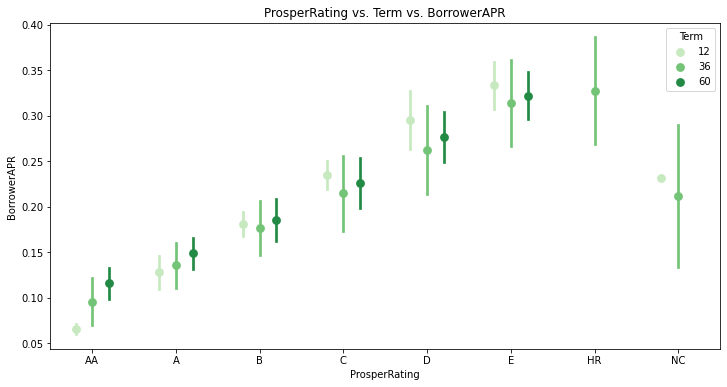

In [82]:
#Are there any impacts on BorrowerAPR from the features of ProsperRating and Term periods?
plt.figure(figsize=[12,6])
sb.pointplot(data=loans,x='ProsperRating',y='BorrowerAPR',hue='Term',palette='Greens',linestyles='', 
             dodge=0.4, ci='sd')
plt.title('ProsperRating vs. Term vs. BorrowerAPR')
plt.ylabel('BorrowerAPR');

For borrowers with higher Rating, like those with B through AA, the BorrowerAPR tends to increase with the Term periods. Interestingly, the BorrowerAPR decreases with the increase of Term periods for people with C to HR ProsperRatings. 

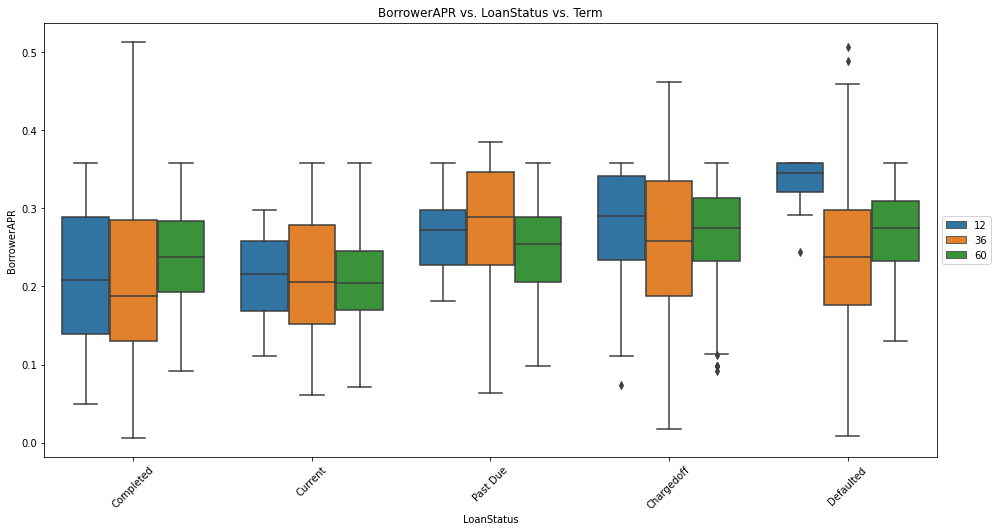

In [83]:
#A boxplot to show the relationship between BorrowerAPR, LoanStatus, with Term as color encoding. 
plt.figure(figsize=[16,8])
sb.boxplot(data=loans, y='BorrowerAPR', x='LoanStatus', hue='Term')
plt.legend(loc=6, bbox_to_anchor=(1.0, 0.5))
plt.title('BorrowerAPR vs. LoanStatus vs. Term')
plt.xticks(rotation = 45);

> The Past Due and Chargedoff types show a similar trend with 12-month Term loans to have higher BorrowerAPR. Plus, the Defaulted category shows another trend that the 12-month Term loans have bigger BorrowerAPR. Both observations were not detected during the Bivariate plot steps earlier but are more visible from this plot.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> When plotting Loan Status and Borrower APR and Loan Original Amount in a multivariate chart, there's no obvious pattern can be determined.
>
> Combining the ProsperRating and Term and BorrowerAPR features shows another tendency clearly in a multivariate graph: BorrowerAPR tends to move in decrement fashion while the ProsperRating is moving in an opposite direction. In orther words, the better a borrower's ProsperRating is, the lower APR the borrower gets.
>
> Through the combination of BorrowerAPR and LoanStatus and Term features, it shows no matter what kind of Term periods of loans are, the BorrowerAPR tend to be higher for those loans ended in the Past Due or Chargedoff or Defaulted buckets. Here is another tendency: the lower the LoanStatus, the higher APR the borrowers ended up with.

### Were there any interesting or surprising interactions between features?

> An interesting insight manifested from the multivariate variable interaction of BorrowerAPR, LoanStatus, and Term was the Defaulted status had a 12-month Term which wasn't obvious in earlier steps, it had a higher BorrowerAPR than that of all other Loan Statuses and their respective Term periods.
>
> ProsperRating and BorrowerAPR were negatively correlated as the higher the ProsperRating the lower will be the risk attached hence the lower will be the APR.

## Conclusions
For the purpose of this analysis, a subset of 12 features was created out of the large numbers of variables in the original dataset. Further data wrangling and investigations were performed in order to identify what factors that would impact the outcomes of a loan. The following are the findings of the exploration.  

**BorrowerAPR & BorrowerRate**
The Correlation Matrix indicates that these two variables have near perfect (0.99) positive linear correlation. These two features can be assessed interchangeably in relation to other variables we discussed here. An observation of the plots showed that JobStatus has an effect on the borrower's APR and Loan Original Amount. Borrowers with Employed status tend to get larger loan amounts and lower APR. We can see that Loan Original Amount greater than 20,000 are much more likely to have lower BorrowerAPR compared to lesser amount of 10,000 and below which are more likely to have higher BorrowerAPR. It thus shows a weak negative correlation. When we compared the relationship of BorrowerAPR and Term, loans with a 36-month Term have a slightly higher BorrowerAPR rates than a 12- or 60-month Term.

**Loan Status**
BorrowerAPR is positively correlated to this feature once it is entered the Past Due/Chargedoff/Defaulted territories. This implies that as the Loan Status changed from Current to Past Due, there is a tendency the borrowers have to pay higher APR rates. The higher rate means the lender wanted to get compensated for the risks of the loans may go from bad to worst statuses like Chargedff or Defaulted.

**Loan Original Amount**
At a high level, this feature did not have obvious direct relationship with Loan Status. When we look closer, some statuses impacted more by loan size. For example, Defaulted-prone statuses have higher loan original amount than Completed ones. And the difference was not that noticeable. On the other hand, the Current type had the largest loan sizes than all other categories. Yet, there is no clear correlated patterns emerged. 

**IncomeRange**
Borrowers with the income range of $50,000-100,000+ had access to bigger loan amounts than other income ranges. In combination with JobStatus, those borrowers with Full-time/Self-employed types have access to better APR rates.  

**Job Status**
There's a tendency that borrowers with Employed status have accessed higher loan amounts than the Not-Employed / Part-time borrowers.

**Term**
In relation to Loan Status, the Past Due, Chargedoff, and Defaulted types with 12-month Term tend to have bigger BorrowerAPR. Similar trend also on display for 36-month and 60-month Terms. 

**ProsperRating**
In relation to the impact of this feature on Loan Status, individual rating impacts Loan Status somewhat different. For instance, the AA grade had the biggest Completed percentage but other grades did not show similar trends. Meanwhile, Defaulted percentage tends to goes up when the rating goes down from AA to HR.

From these findings, we can conclude the following features have varying degree of impacts on the final outcomes (LoanStatus) of a loan: BorrowerAPR, LoanAmount, IncomeRange, JobStatus, Term, and ProsperRaing.

In [84]:
#Store dataframe for Part II analysis
loans.to_csv('prosperLoanData-PartII.csv', index=False)